# **Overfitting and Underfitting**

**Overfitting** occurs in machine learning when a model becomes too complex and starts to perform exceptionally well on the training data but fails to generalize effectively to new, unseen data. As a result, the model loses its ability to make accurate predictions on real-world data, as it has become too specific to the training dataset and captures noise and irrelevant patterns.

**Underfitting** happens in machine learning when a model is too simplistic to capture the underlying patterns in the data. It occurs when the model performs poorly on both the training data and new, unseen data. In other words, the model fails to learn the complexities and nuances present in the dataset, leading to inadequate generalization. Underfitting typically occurs when the model is too simple or when the training data is insufficient to capture the true relationships within the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Cosine function

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [3]:
np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

Lets try to train a **linear regression** model, and see how it performs with respect to the original data.

In [4]:
lin_reg = LinearRegression()

# **Cross Validation**
In our previous exercises we saw that before training a machine learning model it is esstentioal to split it into _training_, _validation_ and _testing_ data. Another way to achieve this is using _cross validation_. This is especially helpful in cases where the amount of data we have is less.

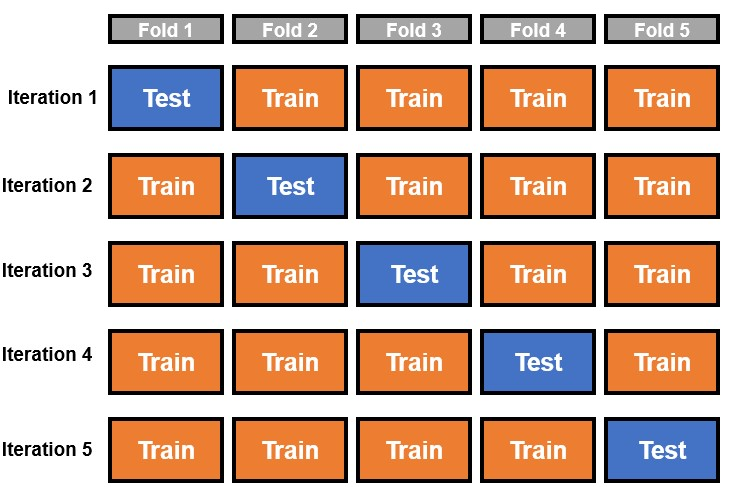

In [5]:
# Evaluate the models using crossvalidation
scores = cross_val_score(lin_reg, X[:,None], y, scoring='neg_mean_squared_error', cv=5)

In [6]:
print(scores)

[-2.73433526 -0.24330471 -0.36321035 -0.09835585 -1.57333334]


In [7]:
# Fitting the model
lin_reg.fit(X[:,None], y)

LinearRegression()

In [8]:
X_test = np.linspace(0, 1, 100)

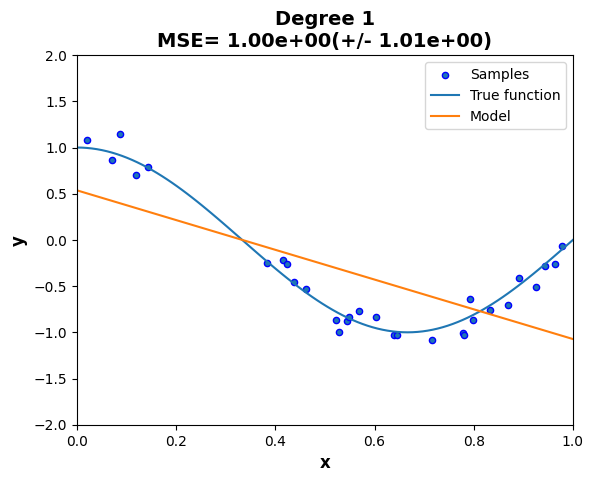

In [9]:
plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.plot(X_test, lin_reg.predict(X_test[:, None]), label='Model')
plt.xlabel("x", fontsize=12, fontweight='bold')
plt.ylabel("y", fontsize=12, fontweight='bold')
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.title("Degree 1\nMSE= {:.2e}(+/- {:.2e})".format(-scores.mean(), scores.std()), fontsize=14, fontweight='bold')
plt.legend()

We can clearly see that the **predicted model** fails to capture the underlying function of the input data. Therefore, we can say that the model is **underfittig**.

Now lets try to fit a higher degree model.

In [10]:
# wrap the pipeline creation process in a function, so we can
# conveniently parameterize the degree of the polynomial
def make_pipeline(degree=1):
    # Polynomial regression is just linear regression with polynomial
    # features, so we can use scikit-learn's PolyNomialFeatures helper
    # to generate an expanded design matrix as an extra pipeline step
    # before model estimation.
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)

    # Construct an sklearn Pipeline, which behaves like a single Estimator.
    pipeline = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", LinearRegression())
    ])

    return pipeline

In [11]:
degree = 15

pipeline = make_pipeline(degree)

# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:,None], y, scoring='neg_mean_squared_error', cv=5)

print(scores)

[-4.96116663e+15 -1.25580581e+00 -1.31657884e-02 -7.40634361e-01
 -9.05225073e+08]


In [12]:
# Fitting the model
pipeline.fit(X[:,None], y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('linear_regression', LinearRegression())])

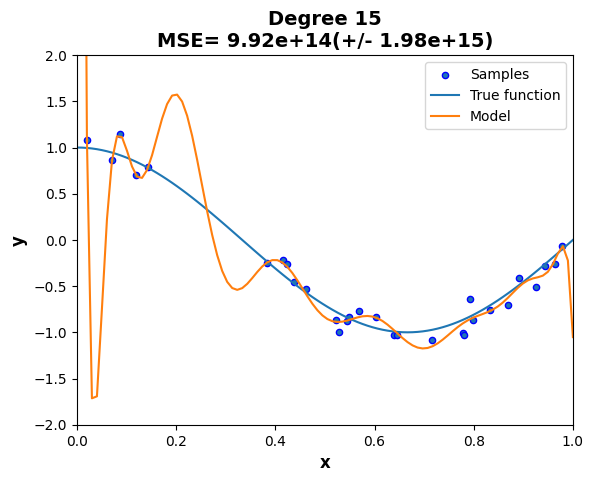

In [13]:
plt.scatter(X, y, edgecolor="b", s=20, label="Samples") # scatter plot of training data
plt.plot(X_test, true_fun(X_test), label="True function")
plt.plot(X_test, pipeline.predict(X_test[:, None]), label='Model')
plt.xlabel("x", fontsize=12, fontweight='bold')
plt.ylabel("y", fontsize=12, fontweight='bold')
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.title("Degree {}\nMSE= {:.2e}(+/- {:.2e})".format(degree, -scores.mean(), scores.std()), fontsize=14, fontweight='bold')
plt.legend()

This time we observe that the predicted model **overfits** the training data, i.e. it learns the noise of the training data. The higher mean squared error (MSE) on the validation data also shows the same phenomenon that the model is less likely to generalize (perform good on unseen **test data**).

Now that we have seen that degree 1 polynomial (linear regression) **underfits** the data, whereas degree 15 polynomial **overfits** the data. This implies that we need to increase the degree from 1 but decrease it from 15. Lets try it _degree 5_.

In [14]:
degree = 5

pipeline = make_pipeline(degree)

# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:,None], y, scoring='neg_mean_squared_error', cv=5)

print(scores)

[-4.47638268e+02 -1.73588046e-02 -1.71092210e-02 -1.50696689e-02
 -1.95188532e-02]


In [15]:
# Fitting the model
pipeline.fit(X[:,None], y)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=5, include_bias=False)),
                ('linear_regression', LinearRegression())])

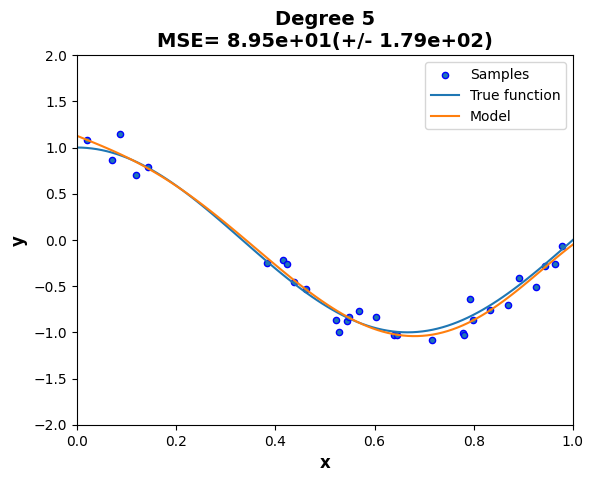

In [16]:
plt.scatter(X, y, edgecolor="b", s=20, label="Samples") # scatter plot of training data
plt.plot(X_test, true_fun(X_test), label="True function")
plt.plot(X_test, pipeline.predict(X_test[:, None]), label='Model')
plt.xlabel("x", fontsize=12, fontweight='bold')
plt.ylabel("y", fontsize=12, fontweight='bold')
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.title("Degree {}\nMSE= {:.2e}(+/- {:.2e})".format(degree, -scores.mean(), scores.std()), fontsize=14, fontweight='bold')
plt.legend()

This time we observe that **predicted** model is very close to the **true function**. It misses some of the training samples, however it _generalizes_ very good when the respect to the test data.

Therefore, we may conclude that **degree=5** is a good compromise between **degree=1** (underfitting) and **degree=15** (overfitting).